In [1]:
import glob
import os
import librosa
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import specgram
from scipy import special, optimize
import scipy.io.wavfile
from scipy.io import wavfile
from matplotlib.pyplot import specgram
import librosa.display
%matplotlib inline
plt.style.use('ggplot')

# plt.rcParams['font.family'] = 'serif'
# plt.rcParams['font.serif'] = 'Ubuntu'
# plt.rcParams['font.monospace'] = 'Ubuntu Mono'
# plt.rcParams['font.size'] = 12
# plt.rcParams['axes.labelsize'] = 11
# plt.rcParams['axes.labelweight'] = 'bold'
# plt.rcParams['axes.titlesize'] = 14
# plt.rcParams['xtick.labelsize'] = 10
# plt.rcParams['ytick.labelsize'] = 10
# plt.rcParams['legend.fontsize'] = 11
# plt.rcParams['figure.titlesize'] = 13

In [2]:
def load_sound_files(parent_dir, file_paths):
    raw_sounds = []
    for fp in file_paths:
        X,sr = librosa.load(parent_dir + fp)
        raw_sounds.append(X)
    return raw_sounds

def plot_waves(sound_names,raw_sounds):
    i = 1
    fig = plt.figure(figsize=(25,10), dpi = 900)
    for n,f in zip(sound_names,raw_sounds):
        plt.subplot(2,5,i)
        librosa.display.waveplot(np.array(f),sr=22050)
        plt.title(n.title())
        i += 1
    plt.suptitle('Figure 1: Waveplot',x=0.5, y=0.95,fontsize=18)
    plt.show()
    
def plot_specgram(sound_names,raw_sounds):
    i = 1
    fig = plt.figure(figsize=(25,10), dpi = 900)
    for n,f in zip(sound_names,raw_sounds):
        plt.subplot(2,5,i)
        specgram(np.array(f), Fs=22050)
        plt.title(n.title())
        i += 1
    plt.suptitle('Figure 2: Spectrogram',x=0.5, y=0.95,fontsize=18)
    plt.show()

def plot_log_power_specgram(sound_names,raw_sounds):
    i = 1
    fig = plt.figure(figsize=(25,10), dpi = 900)
    for n,f in zip(sound_names,raw_sounds):
        plt.subplot(2,5,i)
        D = librosa.amplitude_to_db(np.abs(librosa.stft(f))**2)
        librosa.display.specshow(D,x_axis='time' ,y_axis='log')
        plt.title(n.title())
        i += 1
    plt.suptitle('Figure 3: Log power spectrogram',x=0.5, y=0.95,fontsize=18)
    plt.show()

In [3]:
#eg = '/home/user/Downloads/AO/Urban-Sound-Classification-master/44736-5-0-0.wav'
#_, egd = wavfile.read(eg)
#egs = wav2mfcc(egd)

In [4]:
sound_file_paths = ["7061-6-0-0.wav","7383-3-0-0.wav","7383-3-0-1.wav","24074-1-0-10.wav","24074-1-0-11.wav",
                    "55020-4-0-9.wav","40722-8-0-5.wav","44736-5-0-0.wav","31840-3-0-0.wav","26270-9-0-32.wav"]
sound_names = ["air conditioner","car horn","children playing","dog bark","drilling","engine idling",
               "gun shot","jackhammer","siren","street music"]

parent_dir = '/home/user/Downloads/AO/UrbanSound8K/audio/fold1/'

raw_sounds = load_sound_files(parent_dir, sound_file_paths)

In [ ]:
plot_waves(sound_names,raw_sounds)


In [ ]:
plot_specgram(sound_names,raw_sounds)
plot_log_power_specgram(sound_names,raw_sounds)

In [10]:
def extract_feature(file_name):
    X, sample_rate = librosa.load(file_name)
    print ("Features :",len(X), "sampled at ", sample_rate, "hz")
    stft = np.abs(librosa.stft(X))
    mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=40).T,axis=0)
    chroma = np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T,axis=0)
    mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
    contrast = np.mean(librosa.feature.spectral_contrast(S=stft, sr=sample_rate).T,axis=0)
    tonnetz = np.mean(librosa.feature.tonnetz(y=librosa.effects.harmonic(X), sr=sample_rate).T,axis=0)
    return mfccs,chroma,mel,contrast,tonnetz

def parse_audio_files(parent_dir,sub_dirs,file_ext='*.wav'):
    features, labels = np.empty((0,193)), np.empty(0)
    for label, sub_dir in enumerate(sub_dirs):
        for fn in glob.glob(os.path.join(parent_dir, sub_dir, file_ext)):
            try:
                mfccs, chroma, mel, contrast, tonnetz = extract_feature(fn)
                ext_features = np.hstack([mfccs,chroma,mel,contrast,tonnetz])
                features = np.vstack([features,ext_features])
                labels = np.append(labels, fn.split('fold')[1].split('-')[1])
            except:
                print("Error processing " + fn + " - skipping")
    return np.array(features), np.array(labels, dtype = np.int)

def one_hot_encode(labels):
    n_labels = len(labels)
    n_unique_labels = len(np.unique(labels))
    one_hot_encode = np.zeros((n_labels,n_unique_labels))
    one_hot_encode[np.arange(n_labels), labels] = 1
    return one_hot_encode

def assure_path_exists(path):
    mydir = os.path.join(os.getcwd(), path)
    if not os.path.exists(mydir):
        os.makedirs(mydir)

In [11]:
parent_dir = '/home/user/Downloads/AO/UrbanSound8K/audio'
print(parent_dir)
sub_dirs = ['fold1','fold2','fold3']
features, labels = parse_audio_files(parent_dir,sub_dirs)

/home/user/Downloads/AO/UrbanSound8K/audio
Features : 88200 sampled at  22050 hz
Error processing /home/user/Downloads/AO/UrbanSound8K/audio/fold1/172314-9-0-40.wav - skipping
Error processing /home/user/Downloads/AO/UrbanSound8K/audio/fold1/160009-2-0-50.wav - skipping
Features : 88200 sampled at  22050 hz
Features : 88200 sampled at  22050 hz
Features : 88200 sampled at  22050 hz
Features : 88200 sampled at  22050 hz
Features : 88200 sampled at  22050 hz
Error processing /home/user/Downloads/AO/UrbanSound8K/audio/fold1/177621-0-0-2.wav - skipping
Features : 88200 sampled at  22050 hz
Features : 88200 sampled at  22050 hz
Error processing /home/user/Downloads/AO/UrbanSound8K/audio/fold1/54858-3-2-0.wav - skipping
Error processing /home/user/Downloads/AO/UrbanSound8K/audio/fold1/193698-2-0-89.wav - skipping
Error processing /home/user/Downloads/AO/UrbanSound8K/audio/fold1/103074-7-1-2.wav - skipping
Error processing /home/user/Downloads/AO/UrbanSound8K/audio/fold1/113205-5-0-0.wav - sk

Features : 88200 sampled at  22050 hz
Features : 88200 sampled at  22050 hz
Error processing /home/user/Downloads/AO/UrbanSound8K/audio/fold1/103258-5-0-13.wav - skipping
Error processing /home/user/Downloads/AO/UrbanSound8K/audio/fold1/103074-7-0-2.wav - skipping
Features : 88200 sampled at  22050 hz
Features : 88200 sampled at  22050 hz
Features : 88200 sampled at  22050 hz
Features : 88200 sampled at  22050 hz
Features : 88200 sampled at  22050 hz
Features : 88200 sampled at  22050 hz
Error processing /home/user/Downloads/AO/UrbanSound8K/audio/fold1/182800-2-2-0.wav - skipping
Error processing /home/user/Downloads/AO/UrbanSound8K/audio/fold1/164312-3-3-0.wav - skipping
Features : 1103 sampled at  22050 hz
Error processing /home/user/Downloads/AO/UrbanSound8K/audio/fold1/87275-1-1-0.wav - skipping


/home/user/anaconda3/lib/python3.6/site-packages/librosa/util/utils.py:1467: RuntimeWarning: invalid value encountered in less
  if np.any(X < 0) or np.any(X_ref < 0):
/home/user/anaconda3/lib/python3.6/site-packages/librosa/util/utils.py:1480: RuntimeWarning: invalid value encountered in less
  bad_idx = (Z < np.finfo(dtype).tiny)


Features : 88200 sampled at  22050 hz
Features : 88200 sampled at  22050 hz
Features : 88200 sampled at  22050 hz
Features : 88200 sampled at  22050 hz
Features : 88200 sampled at  22050 hz
Features : 88200 sampled at  22050 hz
Error processing /home/user/Downloads/AO/UrbanSound8K/audio/fold1/176787-5-0-10.wav - skipping
Error processing /home/user/Downloads/AO/UrbanSound8K/audio/fold1/180937-7-2-6.wav - skipping
Error processing /home/user/Downloads/AO/UrbanSound8K/audio/fold1/197073-3-7-0.wav - skipping
Features : 88200 sampled at  22050 hz
Features : 22712 sampled at  22050 hz
Features : 88200 sampled at  22050 hz
Error processing /home/user/Downloads/AO/UrbanSound8K/audio/fold1/137156-9-0-5.wav - skipping
Error processing /home/user/Downloads/AO/UrbanSound8K/audio/fold1/184355-1-0-0.wav - skipping
Features : 24476 sampled at  22050 hz
Error processing /home/user/Downloads/AO/UrbanSound8K/audio/fold1/113205-5-1-7.wav - skipping
Features : 88200 sampled at  22050 hz
Features : 88200 

/home/user/anaconda3/lib/python3.6/site-packages/librosa/util/utils.py:1467: RuntimeWarning: invalid value encountered in less
  if np.any(X < 0) or np.any(X_ref < 0):
/home/user/anaconda3/lib/python3.6/site-packages/librosa/util/utils.py:1480: RuntimeWarning: invalid value encountered in less
  bad_idx = (Z < np.finfo(dtype).tiny)


Features : 49613 sampled at  22050 hz
Features : 24035 sampled at  22050 hz
Features : 88200 sampled at  22050 hz
Features : 88200 sampled at  22050 hz
Error processing /home/user/Downloads/AO/UrbanSound8K/audio/fold1/203356-3-0-0.wav - skipping
Error processing /home/user/Downloads/AO/UrbanSound8K/audio/fold1/197073-3-4-3.wav - skipping
Error processing /home/user/Downloads/AO/UrbanSound8K/audio/fold1/119455-5-0-0.wav - skipping
Features : 88200 sampled at  22050 hz
Features : 14333 sampled at  22050 hz
Error processing /home/user/Downloads/AO/UrbanSound8K/audio/fold1/159738-8-0-5.wav - skipping
Features : 88200 sampled at  22050 hz
Features : 88200 sampled at  22050 hz
Features : 52185 sampled at  22050 hz
Error processing /home/user/Downloads/AO/UrbanSound8K/audio/fold1/177621-0-0-120.wav - skipping
Features : 88200 sampled at  22050 hz
Features : 88200 sampled at  22050 hz
Features : 88200 sampled at  22050 hz
Features : 88200 sampled at  22050 hz
Error processing /home/user/Downlo

/home/user/anaconda3/lib/python3.6/site-packages/librosa/util/utils.py:1467: RuntimeWarning: invalid value encountered in less
  if np.any(X < 0) or np.any(X_ref < 0):
/home/user/anaconda3/lib/python3.6/site-packages/librosa/util/utils.py:1480: RuntimeWarning: invalid value encountered in less
  bad_idx = (Z < np.finfo(dtype).tiny)


Error processing /home/user/Downloads/AO/UrbanSound8K/audio/fold1/119455-5-0-5.wav - skipping
Error processing /home/user/Downloads/AO/UrbanSound8K/audio/fold1/177621-0-0-91.wav - skipping
Features : 19184 sampled at  22050 hz
Error processing /home/user/Downloads/AO/UrbanSound8K/audio/fold1/103258-5-0-0.wav - skipping
Features : 88200 sampled at  22050 hz
Features : 88200 sampled at  22050 hz
Error processing /home/user/Downloads/AO/UrbanSound8K/audio/fold1/176787-5-0-29.wav - skipping
Features : 88200 sampled at  22050 hz
Features : 88200 sampled at  22050 hz
Error processing /home/user/Downloads/AO/UrbanSound8K/audio/fold1/180256-3-0-3.wav - skipping
Error processing /home/user/Downloads/AO/UrbanSound8K/audio/fold1/180937-7-4-0.wav - skipping
Error processing /home/user/Downloads/AO/UrbanSound8K/audio/fold1/177621-0-0-0.wav - skipping
Features : 88200 sampled at  22050 hz
Error processing /home/user/Downloads/AO/UrbanSound8K/audio/fold1/176787-5-0-25.wav - skipping
Features : 88200 

/home/user/anaconda3/lib/python3.6/site-packages/librosa/core/pitch.py:145: UserWarning: Trying to estimate tuning from empty frequency set.
  warnings.warn('Trying to estimate tuning from empty frequency set.')


Features : 88200 sampled at  22050 hz
Features : 88200 sampled at  22050 hz
Features : 88200 sampled at  22050 hz
Features : 29041 sampled at  22050 hz
Features : 88200 sampled at  22050 hz
Error processing /home/user/Downloads/AO/UrbanSound8K/audio/fold1/180937-7-4-7.wav - skipping
Features : 43627 sampled at  22050 hz
Error processing /home/user/Downloads/AO/UrbanSound8K/audio/fold1/159738-8-0-10.wav - skipping
Error processing /home/user/Downloads/AO/UrbanSound8K/audio/fold1/159738-8-0-15.wav - skipping
Error processing /home/user/Downloads/AO/UrbanSound8K/audio/fold1/137156-9-0-79.wav - skipping
Error processing /home/user/Downloads/AO/UrbanSound8K/audio/fold1/162540-1-2-0.wav - skipping
Features : 88200 sampled at  22050 hz
Error processing /home/user/Downloads/AO/UrbanSound8K/audio/fold1/180937-7-2-2.wav - skipping
Features : 88200 sampled at  22050 hz
Error processing /home/user/Downloads/AO/UrbanSound8K/audio/fold1/180937-7-1-12.wav - skipping
Features : 88200 sampled at  22050

/home/user/anaconda3/lib/python3.6/site-packages/librosa/util/utils.py:1467: RuntimeWarning: invalid value encountered in less
  if np.any(X < 0) or np.any(X_ref < 0):
/home/user/anaconda3/lib/python3.6/site-packages/librosa/util/utils.py:1480: RuntimeWarning: invalid value encountered in less
  bad_idx = (Z < np.finfo(dtype).tiny)


Features : 88200 sampled at  22050 hz
Features : 29768 sampled at  22050 hz
Error processing /home/user/Downloads/AO/UrbanSound8K/audio/fold1/103258-5-0-7.wav - skipping
Error processing /home/user/Downloads/AO/UrbanSound8K/audio/fold1/175845-1-0-0.wav - skipping
Error processing /home/user/Downloads/AO/UrbanSound8K/audio/fold1/180937-7-4-14.wav - skipping
Error processing /home/user/Downloads/AO/UrbanSound8K/audio/fold1/159738-8-0-6.wav - skipping
Features : 88200 sampled at  22050 hz
Error processing /home/user/Downloads/AO/UrbanSound8K/audio/fold1/177621-0-0-88.wav - skipping
Features : 88200 sampled at  22050 hz
Error processing /home/user/Downloads/AO/UrbanSound8K/audio/fold1/137156-9-0-31.wav - skipping
Features : 88200 sampled at  22050 hz
Error processing /home/user/Downloads/AO/UrbanSound8K/audio/fold1/177621-0-0-127.wav - skipping
Error processing /home/user/Downloads/AO/UrbanSound8K/audio/fold1/118101-3-0-3.wav - skipping
Error processing /home/user/Downloads/AO/UrbanSound8K

Error processing /home/user/Downloads/AO/UrbanSound8K/audio/fold1/182800-2-2-2.wav - skipping
Error processing /home/user/Downloads/AO/UrbanSound8K/audio/fold1/155202-9-0-135.wav - skipping
Features : 88200 sampled at  22050 hz
Error processing /home/user/Downloads/AO/UrbanSound8K/audio/fold1/177621-0-0-109.wav - skipping
Error processing /home/user/Downloads/AO/UrbanSound8K/audio/fold1/180937-7-3-30.wav - skipping
Features : 88200 sampled at  22050 hz
Features : 88200 sampled at  22050 hz
Features : 88200 sampled at  22050 hz
Error processing /home/user/Downloads/AO/UrbanSound8K/audio/fold1/135776-2-0-50.wav - skipping
Error processing /home/user/Downloads/AO/UrbanSound8K/audio/fold1/193394-3-0-11.wav - skipping
Features : 88200 sampled at  22050 hz
Features : 88200 sampled at  22050 hz
Error processing /home/user/Downloads/AO/UrbanSound8K/audio/fold1/160009-2-0-30.wav - skipping
Features : 88200 sampled at  22050 hz
Features : 37485 sampled at  22050 hz
Features : 88200 sampled at  2

/home/user/anaconda3/lib/python3.6/site-packages/librosa/core/pitch.py:145: UserWarning: Trying to estimate tuning from empty frequency set.
  warnings.warn('Trying to estimate tuning from empty frequency set.')


Error processing /home/user/Downloads/AO/UrbanSound8K/audio/fold1/194732-9-0-175.wav - skipping
Features : 22883 sampled at  22050 hz
Error processing /home/user/Downloads/AO/UrbanSound8K/audio/fold1/176787-5-0-5.wav - skipping
Features : 88200 sampled at  22050 hz
Features : 5513 sampled at  22050 hz
Error processing /home/user/Downloads/AO/UrbanSound8K/audio/fold1/176787-5-0-23.wav - skipping
Features : 88200 sampled at  22050 hz
Features : 88200 sampled at  22050 hz
Error processing /home/user/Downloads/AO/UrbanSound8K/audio/fold1/176787-5-0-7.wav - skipping
Error processing /home/user/Downloads/AO/UrbanSound8K/audio/fold1/135776-2-0-40.wav - skipping
Error processing /home/user/Downloads/AO/UrbanSound8K/audio/fold1/166268-3-1-0.wav - skipping
Error processing /home/user/Downloads/AO/UrbanSound8K/audio/fold1/180937-7-1-13.wav - skipping
Error processing /home/user/Downloads/AO/UrbanSound8K/audio/fold1/103074-7-2-0.wav - skipping
Error processing /home/user/Downloads/AO/UrbanSound8K/

/home/user/anaconda3/lib/python3.6/site-packages/librosa/core/pitch.py:145: UserWarning: Trying to estimate tuning from empty frequency set.
  warnings.warn('Trying to estimate tuning from empty frequency set.')


Features : 88200 sampled at  22050 hz
Features : 53141 sampled at  22050 hz
Error processing /home/user/Downloads/AO/UrbanSound8K/audio/fold1/135776-2-0-37.wav - skipping
Features : 88200 sampled at  22050 hz
Features : 88200 sampled at  22050 hz
Features : 88200 sampled at  22050 hz
Features : 88200 sampled at  22050 hz
Features : 88200 sampled at  22050 hz
Error processing /home/user/Downloads/AO/UrbanSound8K/audio/fold1/203356-3-0-2.wav - skipping
Features : 88200 sampled at  22050 hz
Features : 88200 sampled at  22050 hz
Error processing /home/user/Downloads/AO/UrbanSound8K/audio/fold1/180937-7-4-10.wav - skipping
Features : 88200 sampled at  22050 hz
Features : 88200 sampled at  22050 hz
Features : 9170 sampled at  22050 hz


/home/user/anaconda3/lib/python3.6/site-packages/librosa/core/pitch.py:145: UserWarning: Trying to estimate tuning from empty frequency set.
  warnings.warn('Trying to estimate tuning from empty frequency set.')


Features : 88200 sampled at  22050 hz
Features : 31275 sampled at  22050 hz
Error processing /home/user/Downloads/AO/UrbanSound8K/audio/fold1/135776-2-0-49.wav - skipping
Features : 20716 sampled at  22050 hz
Features : 88200 sampled at  22050 hz
Features : 88200 sampled at  22050 hz
Error processing /home/user/Downloads/AO/UrbanSound8K/audio/fold1/159738-8-0-9.wav - skipping
Features : 88200 sampled at  22050 hz
Features : 88200 sampled at  22050 hz
Features : 88200 sampled at  22050 hz
Error processing /home/user/Downloads/AO/UrbanSound8K/audio/fold1/159738-8-0-19.wav - skipping
Features : 88200 sampled at  22050 hz
Features : 88200 sampled at  22050 hz
Error processing /home/user/Downloads/AO/UrbanSound8K/audio/fold1/130030-3-0-0.wav - skipping
Error processing /home/user/Downloads/AO/UrbanSound8K/audio/fold1/159738-8-0-7.wav - skipping
Features : 88200 sampled at  22050 hz
Features : 88200 sampled at  22050 hz
Features : 19184 sampled at  22050 hz
Features : 88200 sampled at  22050

/home/user/anaconda3/lib/python3.6/site-packages/librosa/core/pitch.py:145: UserWarning: Trying to estimate tuning from empty frequency set.
  warnings.warn('Trying to estimate tuning from empty frequency set.')


Features : 88200 sampled at  22050 hz
Features : 88200 sampled at  22050 hz
Features : 88200 sampled at  22050 hz
Features : 88200 sampled at  22050 hz
Features : 88200 sampled at  22050 hz
Error processing /home/user/Downloads/AO/UrbanSound8K/audio/fold1/197318-6-0-0.wav - skipping
Features : 88200 sampled at  22050 hz
Features : 88200 sampled at  22050 hz
Error processing /home/user/Downloads/AO/UrbanSound8K/audio/fold1/180937-7-2-4.wav - skipping
Features : 88200 sampled at  22050 hz
Features : 88200 sampled at  22050 hz
Error processing /home/user/Downloads/AO/UrbanSound8K/audio/fold1/177621-0-0-128.wav - skipping
Features : 88200 sampled at  22050 hz
Features : 88200 sampled at  22050 hz
Error processing /home/user/Downloads/AO/UrbanSound8K/audio/fold1/159738-8-0-11.wav - skipping
Error processing /home/user/Downloads/AO/UrbanSound8K/audio/fold1/159738-8-0-4.wav - skipping
Features : 88200 sampled at  22050 hz
Features : 18302 sampled at  22050 hz


/home/user/anaconda3/lib/python3.6/site-packages/librosa/core/pitch.py:145: UserWarning: Trying to estimate tuning from empty frequency set.
  warnings.warn('Trying to estimate tuning from empty frequency set.')


Features : 88200 sampled at  22050 hz
Features : 88200 sampled at  22050 hz
Features : 88200 sampled at  22050 hz
Error processing /home/user/Downloads/AO/UrbanSound8K/audio/fold1/177621-0-0-27.wav - skipping
Features : 67835 sampled at  22050 hz
Features : 88200 sampled at  22050 hz
Features : 88200 sampled at  22050 hz
Features : 76293 sampled at  22050 hz
Features : 88200 sampled at  22050 hz
Error processing /home/user/Downloads/AO/UrbanSound8K/audio/fold1/176787-5-0-20.wav - skipping
Features : 88200 sampled at  22050 hz
Error processing /home/user/Downloads/AO/UrbanSound8K/audio/fold1/193698-2-0-114.wav - skipping
Features : 88200 sampled at  22050 hz
Error processing /home/user/Downloads/AO/UrbanSound8K/audio/fold1/193394-3-0-7.wav - skipping
Features : 88200 sampled at  22050 hz
Features : 88200 sampled at  22050 hz
Features : 88200 sampled at  22050 hz
Features : 88200 sampled at  22050 hz
Features : 88200 sampled at  22050 hz
Features : 88200 sampled at  22050 hz
Error proces

/home/user/anaconda3/lib/python3.6/site-packages/librosa/core/pitch.py:145: UserWarning: Trying to estimate tuning from empty frequency set.
  warnings.warn('Trying to estimate tuning from empty frequency set.')


Features : 25799 sampled at  22050 hz
Error processing /home/user/Downloads/AO/UrbanSound8K/audio/fold2/203929-7-7-16.wav - skipping
Features : 88200 sampled at  22050 hz
Error processing /home/user/Downloads/AO/UrbanSound8K/audio/fold2/159747-8-0-20.wav - skipping
Error processing /home/user/Downloads/AO/UrbanSound8K/audio/fold2/169098-7-4-3.wav - skipping
Error processing /home/user/Downloads/AO/UrbanSound8K/audio/fold2/169098-7-0-7.wav - skipping
Error processing /home/user/Downloads/AO/UrbanSound8K/audio/fold2/23131-3-0-0.wav - skipping
Error processing /home/user/Downloads/AO/UrbanSound8K/audio/fold2/149254-9-0-30.wav - skipping
Error processing /home/user/Downloads/AO/UrbanSound8K/audio/fold2/155219-2-0-57.wav - skipping
Features : 88200 sampled at  22050 hz
Features : 88200 sampled at  22050 hz
Features : 88200 sampled at  22050 hz
Error processing /home/user/Downloads/AO/UrbanSound8K/audio/fold2/159750-8-0-3.wav - skipping
Error processing /home/user/Downloads/AO/UrbanSound8K/a

/home/user/anaconda3/lib/python3.6/site-packages/librosa/core/pitch.py:145: UserWarning: Trying to estimate tuning from empty frequency set.
  warnings.warn('Trying to estimate tuning from empty frequency set.')


Error processing /home/user/Downloads/AO/UrbanSound8K/audio/fold2/160011-2-0-0.wav - skipping
Error processing /home/user/Downloads/AO/UrbanSound8K/audio/fold2/152908-5-0-4.wav - skipping
Features : 88200 sampled at  22050 hz
Features : 4616 sampled at  22050 hz
Error processing /home/user/Downloads/AO/UrbanSound8K/audio/fold2/159747-8-0-1.wav - skipping
Error processing /home/user/Downloads/AO/UrbanSound8K/audio/fold2/203929-7-2-5.wav - skipping
Features : 88200 sampled at  22050 hz
Error processing /home/user/Downloads/AO/UrbanSound8K/audio/fold2/104817-4-0-10.wav - skipping
Error processing /home/user/Downloads/AO/UrbanSound8K/audio/fold2/169098-7-0-2.wav - skipping
Features : 88200 sampled at  22050 hz
Error processing /home/user/Downloads/AO/UrbanSound8K/audio/fold2/177592-5-0-1.wav - skipping
Features : 88200 sampled at  22050 hz
Features : 87539 sampled at  22050 hz
Features : 88200 sampled at  22050 hz
Error processing /home/user/Downloads/AO/UrbanSound8K/audio/fold2/203929-7-9

/home/user/anaconda3/lib/python3.6/site-packages/librosa/core/pitch.py:145: UserWarning: Trying to estimate tuning from empty frequency set.
  warnings.warn('Trying to estimate tuning from empty frequency set.')


Features : 88200 sampled at  22050 hz
Features : 88200 sampled at  22050 hz
Error processing /home/user/Downloads/AO/UrbanSound8K/audio/fold2/203929-7-5-0.wav - skipping
Features : 11687 sampled at  22050 hz
Features : 25354 sampled at  22050 hz
Error processing /home/user/Downloads/AO/UrbanSound8K/audio/fold2/104817-4-0-4.wav - skipping
Features : 88200 sampled at  22050 hz
Error processing /home/user/Downloads/AO/UrbanSound8K/audio/fold2/201652-5-3-4.wav - skipping
Features : 88200 sampled at  22050 hz
Error processing /home/user/Downloads/AO/UrbanSound8K/audio/fold2/177592-5-0-9.wav - skipping
Error processing /home/user/Downloads/AO/UrbanSound8K/audio/fold2/147926-0-0-54.wav - skipping
Features : 88200 sampled at  22050 hz
Error processing /home/user/Downloads/AO/UrbanSound8K/audio/fold2/147926-0-0-16.wav - skipping
Features : 88200 sampled at  22050 hz
Error processing /home/user/Downloads/AO/UrbanSound8K/audio/fold2/203929-7-7-2.wav - skipping
Features : 88200 sampled at  22050 h

/home/user/anaconda3/lib/python3.6/site-packages/librosa/core/pitch.py:145: UserWarning: Trying to estimate tuning from empty frequency set.
  warnings.warn('Trying to estimate tuning from empty frequency set.')


Features : 30209 sampled at  22050 hz
Features : 88200 sampled at  22050 hz
Error processing /home/user/Downloads/AO/UrbanSound8K/audio/fold2/203929-7-3-9.wav - skipping
Features : 88200 sampled at  22050 hz
Features : 88200 sampled at  22050 hz
Error processing /home/user/Downloads/AO/UrbanSound8K/audio/fold2/159747-8-0-4.wav - skipping
Features : 88200 sampled at  22050 hz
Error processing /home/user/Downloads/AO/UrbanSound8K/audio/fold2/178520-2-0-27.wav - skipping
Error processing /home/user/Downloads/AO/UrbanSound8K/audio/fold2/197320-6-1-0.wav - skipping
Error processing /home/user/Downloads/AO/UrbanSound8K/audio/fold2/179864-1-0-0.wav - skipping
Error processing /home/user/Downloads/AO/UrbanSound8K/audio/fold2/158607-3-1-0.wav - skipping
Features : 88200 sampled at  22050 hz
Error processing /home/user/Downloads/AO/UrbanSound8K/audio/fold2/146690-0-0-35.wav - skipping
Error processing /home/user/Downloads/AO/UrbanSound8K/audio/fold2/98202-9-1-5.wav - skipping
Error processing /h

/home/user/anaconda3/lib/python3.6/site-packages/librosa/util/utils.py:1467: RuntimeWarning: invalid value encountered in less
  if np.any(X < 0) or np.any(X_ref < 0):
/home/user/anaconda3/lib/python3.6/site-packages/librosa/util/utils.py:1480: RuntimeWarning: invalid value encountered in less
  bad_idx = (Z < np.finfo(dtype).tiny)


Features : 88200 sampled at  22050 hz
Error processing /home/user/Downloads/AO/UrbanSound8K/audio/fold2/203929-7-9-18.wav - skipping
Features : 51291 sampled at  22050 hz
Features : 88200 sampled at  22050 hz
Error processing /home/user/Downloads/AO/UrbanSound8K/audio/fold2/146690-0-0-116.wav - skipping
Features : 80042 sampled at  22050 hz
Error processing /home/user/Downloads/AO/UrbanSound8K/audio/fold2/96475-9-0-6.wav - skipping
Features : 29964 sampled at  22050 hz
Error processing /home/user/Downloads/AO/UrbanSound8K/audio/fold2/158597-2-0-57.wav - skipping
Features : 88200 sampled at  22050 hz
Features : 88200 sampled at  22050 hz
Features : 88200 sampled at  22050 hz
Features : 88200 sampled at  22050 hz
Features : 88200 sampled at  22050 hz
Features : 13451 sampled at  22050 hz
Error processing /home/user/Downloads/AO/UrbanSound8K/audio/fold2/159747-8-0-18.wav - skipping
Error processing /home/user/Downloads/AO/UrbanSound8K/audio/fold2/159747-8-0-15.wav - skipping
Features : 27

Features : 88200 sampled at  22050 hz
Error processing /home/user/Downloads/AO/UrbanSound8K/audio/fold2/71080-4-1-0.wav - skipping
Features : 24225 sampled at  22050 hz
Error processing /home/user/Downloads/AO/UrbanSound8K/audio/fold2/147926-0-0-2.wav - skipping
Features : 88200 sampled at  22050 hz
Features : 13451 sampled at  22050 hz
Error processing /home/user/Downloads/AO/UrbanSound8K/audio/fold2/182739-2-0-24.wav - skipping


/home/user/anaconda3/lib/python3.6/site-packages/librosa/core/pitch.py:145: UserWarning: Trying to estimate tuning from empty frequency set.
  warnings.warn('Trying to estimate tuning from empty frequency set.')


Features : 88200 sampled at  22050 hz
Error processing /home/user/Downloads/AO/UrbanSound8K/audio/fold2/201652-5-3-3.wav - skipping
Error processing /home/user/Downloads/AO/UrbanSound8K/audio/fold2/162541-1-2-0.wav - skipping
Features : 88200 sampled at  22050 hz
Error processing /home/user/Downloads/AO/UrbanSound8K/audio/fold2/152908-5-0-8.wav - skipping
Error processing /home/user/Downloads/AO/UrbanSound8K/audio/fold2/147926-0-0-5.wav - skipping
Features : 88200 sampled at  22050 hz
Features : 88200 sampled at  22050 hz
Error processing /home/user/Downloads/AO/UrbanSound8K/audio/fold2/203929-7-9-0.wav - skipping
Features : 11246 sampled at  22050 hz
Error processing /home/user/Downloads/AO/UrbanSound8K/audio/fold2/178520-2-0-23.wav - skipping
Features : 18010 sampled at  22050 hz
Features : 88200 sampled at  22050 hz
Features : 88200 sampled at  22050 hz
Error processing /home/user/Downloads/AO/UrbanSound8K/audio/fold2/201652-5-4-1.wav - skipping
Features : 54243 sampled at  22050 hz

/home/user/anaconda3/lib/python3.6/site-packages/librosa/core/pitch.py:145: UserWarning: Trying to estimate tuning from empty frequency set.
  warnings.warn('Trying to estimate tuning from empty frequency set.')


Error processing /home/user/Downloads/AO/UrbanSound8K/audio/fold2/106015-5-0-14.wav - skipping
Error processing /home/user/Downloads/AO/UrbanSound8K/audio/fold2/192269-2-0-56.wav - skipping
Features : 41675 sampled at  22050 hz
Features : 88200 sampled at  22050 hz
Error processing /home/user/Downloads/AO/UrbanSound8K/audio/fold2/178521-2-0-2.wav - skipping
Error processing /home/user/Downloads/AO/UrbanSound8K/audio/fold2/169098-7-4-5.wav - skipping
Features : 88200 sampled at  22050 hz
Features : 88200 sampled at  22050 hz
Error processing /home/user/Downloads/AO/UrbanSound8K/audio/fold2/159710-6-0-0.wav - skipping
Error processing /home/user/Downloads/AO/UrbanSound8K/audio/fold2/146690-0-0-115.wav - skipping
Features : 88200 sampled at  22050 hz
Features : 88200 sampled at  22050 hz
Features : 10584 sampled at  22050 hz
Error processing /home/user/Downloads/AO/UrbanSound8K/audio/fold2/203929-7-5-10.wav - skipping
Error processing /home/user/Downloads/AO/UrbanSound8K/audio/fold2/15290

/home/user/anaconda3/lib/python3.6/site-packages/librosa/core/pitch.py:145: UserWarning: Trying to estimate tuning from empty frequency set.
  warnings.warn('Trying to estimate tuning from empty frequency set.')


Features : 88200 sampled at  22050 hz
Error processing /home/user/Downloads/AO/UrbanSound8K/audio/fold2/203929-7-7-0.wav - skipping
Features : 37383 sampled at  22050 hz
Features : 15215 sampled at  22050 hz
Features : 24600 sampled at  22050 hz
Error processing /home/user/Downloads/AO/UrbanSound8K/audio/fold2/113201-5-0-0.wav - skipping
Error processing /home/user/Downloads/AO/UrbanSound8K/audio/fold2/106015-5-0-16.wav - skipping
Error processing /home/user/Downloads/AO/UrbanSound8K/audio/fold2/113201-5-0-4.wav - skipping
Features : 88200 sampled at  22050 hz
Features : 88200 sampled at  22050 hz
Features : 88200 sampled at  22050 hz
Error processing /home/user/Downloads/AO/UrbanSound8K/audio/fold2/178521-2-0-86.wav - skipping
Error processing /home/user/Downloads/AO/UrbanSound8K/audio/fold2/159750-8-0-2.wav - skipping
Features : 88200 sampled at  22050 hz
Features : 88200 sampled at  22050 hz
Features : 88200 sampled at  22050 hz
Error processing /home/user/Downloads/AO/UrbanSound8K/

/home/user/anaconda3/lib/python3.6/site-packages/librosa/core/pitch.py:145: UserWarning: Trying to estimate tuning from empty frequency set.
  warnings.warn('Trying to estimate tuning from empty frequency set.')


Features : 88200 sampled at  22050 hz
Error processing /home/user/Downloads/AO/UrbanSound8K/audio/fold2/159747-8-0-7.wav - skipping
Error processing /home/user/Downloads/AO/UrbanSound8K/audio/fold2/159747-8-0-12.wav - skipping
Error processing /home/user/Downloads/AO/UrbanSound8K/audio/fold2/147926-0-0-12.wav - skipping
Features : 88200 sampled at  22050 hz
Features : 8068 sampled at  22050 hz
Error processing /home/user/Downloads/AO/UrbanSound8K/audio/fold2/169098-7-0-0.wav - skipping
Features : 88200 sampled at  22050 hz
Error processing /home/user/Downloads/AO/UrbanSound8K/audio/fold2/106015-5-0-8.wav - skipping
Features : 88200 sampled at  22050 hz
Error processing /home/user/Downloads/AO/UrbanSound8K/audio/fold2/160366-3-0-8.wav - skipping
Error processing /home/user/Downloads/AO/UrbanSound8K/audio/fold2/203929-7-6-11.wav - skipping
Error processing /home/user/Downloads/AO/UrbanSound8K/audio/fold2/146690-0-0-64.wav - skipping
Error processing /home/user/Downloads/AO/UrbanSound8K/a

/home/user/anaconda3/lib/python3.6/site-packages/librosa/core/pitch.py:145: UserWarning: Trying to estimate tuning from empty frequency set.
  warnings.warn('Trying to estimate tuning from empty frequency set.')


Features : 73105 sampled at  22050 hz
Features : 88200 sampled at  22050 hz
Features : 88200 sampled at  22050 hz
Features : 88200 sampled at  22050 hz
Error processing /home/user/Downloads/AO/UrbanSound8K/audio/fold2/159743-8-0-0.wav - skipping
Error processing /home/user/Downloads/AO/UrbanSound8K/audio/fold2/201652-5-4-2.wav - skipping
Features : 88200 sampled at  22050 hz
Error processing /home/user/Downloads/AO/UrbanSound8K/audio/fold2/98202-9-0-10.wav - skipping
Features : 88200 sampled at  22050 hz
Features : 43794 sampled at  22050 hz
Features : 88200 sampled at  22050 hz
Features : 88200 sampled at  22050 hz
Features : 15215 sampled at  22050 hz
Error processing /home/user/Downloads/AO/UrbanSound8K/audio/fold2/169098-7-4-9.wav - skipping
Error processing /home/user/Downloads/AO/UrbanSound8K/audio/fold2/104817-4-0-3.wav - skipping
Error processing /home/user/Downloads/AO/UrbanSound8K/audio/fold2/146690-0-0-38.wav - skipping
Error processing /home/user/Downloads/AO/UrbanSound8K/a

/home/user/anaconda3/lib/python3.6/site-packages/librosa/core/pitch.py:145: UserWarning: Trying to estimate tuning from empty frequency set.
  warnings.warn('Trying to estimate tuning from empty frequency set.')


Error processing /home/user/Downloads/AO/UrbanSound8K/audio/fold2/203929-7-3-3.wav - skipping
Error processing /home/user/Downloads/AO/UrbanSound8K/audio/fold2/146690-0-0-93.wav - skipping
Features : 42116 sampled at  22050 hz
Error processing /home/user/Downloads/AO/UrbanSound8K/audio/fold2/106015-5-0-10.wav - skipping
Error processing /home/user/Downloads/AO/UrbanSound8K/audio/fold2/146690-0-0-80.wav - skipping
Features : 88200 sampled at  22050 hz
Error processing /home/user/Downloads/AO/UrbanSound8K/audio/fold2/194841-9-0-48.wav - skipping
Error processing /home/user/Downloads/AO/UrbanSound8K/audio/fold2/106015-5-0-4.wav - skipping
Error processing /home/user/Downloads/AO/UrbanSound8K/audio/fold2/106015-5-0-2.wav - skipping
Error processing /home/user/Downloads/AO/UrbanSound8K/audio/fold2/106015-5-0-15.wav - skipping
Error processing /home/user/Downloads/AO/UrbanSound8K/audio/fold2/96169-9-1-3.wav - skipping
Features : 41141 sampled at  22050 hz
Features : 88200 sampled at  22050 h

Features : 88200 sampled at  22050 hz
Error processing /home/user/Downloads/AO/UrbanSound8K/audio/fold2/104817-4-0-9.wav - skipping
Error processing /home/user/Downloads/AO/UrbanSound8K/audio/fold2/169098-7-4-0.wav - skipping
Error processing /home/user/Downloads/AO/UrbanSound8K/audio/fold2/162541-1-1-0.wav - skipping
Error processing /home/user/Downloads/AO/UrbanSound8K/audio/fold2/201652-5-3-2.wav - skipping
Features : 61057 sampled at  22050 hz
Features : 88200 sampled at  22050 hz
Features : 88200 sampled at  22050 hz
Features : 18251 sampled at  22050 hz
Error processing /home/user/Downloads/AO/UrbanSound8K/audio/fold3/144068-5-4-2.wav - skipping
Features : 88200 sampled at  22050 hz
Features : 13451 sampled at  22050 hz
Error processing /home/user/Downloads/AO/UrbanSound8K/audio/fold3/177742-0-0-202.wav - skipping
Features : 88200 sampled at  22050 hz
Features : 88200 sampled at  22050 hz
Features : 88200 sampled at  22050 hz
Features : 88200 sampled at  22050 hz
Error processing

Features : 88200 sampled at  22050 hz
Features : 83543 sampled at  22050 hz
Features : 88200 sampled at  22050 hz
Features : 88200 sampled at  22050 hz
Features : 88200 sampled at  22050 hz
Features : 40060 sampled at  22050 hz
Error processing /home/user/Downloads/AO/UrbanSound8K/audio/fold3/185375-9-0-26.wav - skipping
Features : 88200 sampled at  22050 hz
Features : 88200 sampled at  22050 hz
Features : 88200 sampled at  22050 hz
Features : 88200 sampled at  22050 hz
Error processing /home/user/Downloads/AO/UrbanSound8K/audio/fold3/200161-3-6-3.wav - skipping
Features : 88200 sampled at  22050 hz
Error processing /home/user/Downloads/AO/UrbanSound8K/audio/fold3/185373-9-1-7.wav - skipping
Error processing /home/user/Downloads/AO/UrbanSound8K/audio/fold3/146714-0-0-18.wav - skipping
Error processing /home/user/Downloads/AO/UrbanSound8K/audio/fold3/146714-0-0-0.wav - skipping
Features : 35441 sampled at  22050 hz
Features : 52700 sampled at  22050 hz
Features : 88200 sampled at  22050

Features : 88200 sampled at  22050 hz
Features : 88200 sampled at  22050 hz
Features : 88200 sampled at  22050 hz
Features : 88200 sampled at  22050 hz
Features : 29768 sampled at  22050 hz
Features : 88200 sampled at  22050 hz
Error processing /home/user/Downloads/AO/UrbanSound8K/audio/fold3/177742-0-0-73.wav - skipping
Features : 88200 sampled at  22050 hz
Error processing /home/user/Downloads/AO/UrbanSound8K/audio/fold3/155263-2-0-23.wav - skipping
Features : 88200 sampled at  22050 hz
Features : 88200 sampled at  22050 hz
Features : 88200 sampled at  22050 hz
Features : 88200 sampled at  22050 hz
Features : 88200 sampled at  22050 hz
Features : 88200 sampled at  22050 hz
Error processing /home/user/Downloads/AO/UrbanSound8K/audio/fold3/132855-2-0-58.wav - skipping
Features : 88200 sampled at  22050 hz
Features : 88200 sampled at  22050 hz
Features : 88200 sampled at  22050 hz
Features : 88200 sampled at  22050 hz
Features : 88200 sampled at  22050 hz
Error processing /home/user/Dow

Features : 88200 sampled at  22050 hz
Features : 88200 sampled at  22050 hz
Features : 88200 sampled at  22050 hz
Features : 88200 sampled at  22050 hz
Features : 88200 sampled at  22050 hz
Features : 88200 sampled at  22050 hz
Features : 88200 sampled at  22050 hz
Features : 88200 sampled at  22050 hz
Features : 88200 sampled at  22050 hz
Features : 88200 sampled at  22050 hz
Features : 2642 sampled at  22050 hz
Features : 88200 sampled at  22050 hz
Features : 88200 sampled at  22050 hz
Features : 88200 sampled at  22050 hz
Features : 33075 sampled at  22050 hz
Features : 88200 sampled at  22050 hz
Features : 88200 sampled at  22050 hz
Error processing /home/user/Downloads/AO/UrbanSound8K/audio/fold3/144068-5-0-12.wav - skipping
Features : 88200 sampled at  22050 hz
Features : 88200 sampled at  22050 hz
Features : 88200 sampled at  22050 hz
Features : 88200 sampled at  22050 hz
Features : 88200 sampled at  22050 hz
Error processing /home/user/Downloads/AO/UrbanSound8K/audio/fold3/1798

Error processing /home/user/Downloads/AO/UrbanSound8K/audio/fold3/132855-2-0-77.wav - skipping
Error processing /home/user/Downloads/AO/UrbanSound8K/audio/fold3/200161-3-7-0.wav - skipping
Error processing /home/user/Downloads/AO/UrbanSound8K/audio/fold3/144068-5-4-8.wav - skipping
Features : 88200 sampled at  22050 hz
Error processing /home/user/Downloads/AO/UrbanSound8K/audio/fold3/197074-3-0-5.wav - skipping
Features : 88200 sampled at  22050 hz
Features : 88200 sampled at  22050 hz
Features : 22932 sampled at  22050 hz
Features : 88200 sampled at  22050 hz
Features : 88200 sampled at  22050 hz
Error processing /home/user/Downloads/AO/UrbanSound8K/audio/fold3/177742-0-0-67.wav - skipping
Error processing /home/user/Downloads/AO/UrbanSound8K/audio/fold3/179386-3-0-3.wav - skipping
Features : 88200 sampled at  22050 hz
Features : 88200 sampled at  22050 hz
Features : 88200 sampled at  22050 hz
Features : 88200 sampled at  22050 hz
Features : 88200 sampled at  22050 hz
Features : 27122

Features : 88200 sampled at  22050 hz
Features : 88200 sampled at  22050 hz
Features : 88200 sampled at  22050 hz
Features : 88200 sampled at  22050 hz
Features : 88200 sampled at  22050 hz
Features : 88200 sampled at  22050 hz
Error processing /home/user/Downloads/AO/UrbanSound8K/audio/fold3/37560-4-0-2.wav - skipping
Features : 88200 sampled at  22050 hz
Features : 88200 sampled at  22050 hz
Features : 88200 sampled at  22050 hz
Features : 88200 sampled at  22050 hz
Features : 55787 sampled at  22050 hz
Features : 88200 sampled at  22050 hz
Error processing /home/user/Downloads/AO/UrbanSound8K/audio/fold3/177742-0-0-3.wav - skipping
Features : 88200 sampled at  22050 hz
Features : 88200 sampled at  22050 hz
Features : 88200 sampled at  22050 hz
Features : 88200 sampled at  22050 hz
Error processing /home/user/Downloads/AO/UrbanSound8K/audio/fold3/172315-9-0-113.wav - skipping
Features : 88200 sampled at  22050 hz
Features : 88200 sampled at  22050 hz
Features : 88200 sampled at  2205

In [12]:
features

array([[-2.32163921e+02,  8.11806293e+01,  6.69651564e+00, ...,
        -4.64109236e-02,  1.53847829e-02,  1.08760866e-02],
       [-3.14367831e+02,  1.25863882e+01,  2.50557428e+01, ...,
         3.51648506e-03,  1.28891116e-02,  1.22686152e-02],
       [-2.81727884e+02,  1.13939801e+02, -3.14486734e+01, ...,
         9.49880135e-03,  1.00420296e-02,  1.18370047e-03],
       ...,
       [-9.33263808e+01,  1.31402668e+02, -2.41554112e+01, ...,
        -7.36055919e-02,  5.45828300e-03,  9.06724305e-03],
       [-2.56946245e+02,  1.13852900e+02, -4.94092826e+01, ...,
         2.47873303e-02,  4.58356477e-03, -2.77929850e-02],
       [-9.38873386e+01,  1.02933817e+02, -9.17715188e+00, ...,
         2.08352323e-02, -1.51243176e-02, -4.79570747e-04]])

In [13]:
labels = one_hot_encode(labels)

train_test_split = np.random.rand(len(features)) < 0.70
train_x = features[train_test_split]
train_y = labels[train_test_split]
test_x = features[~train_test_split]
test_y = labels[~train_test_split]

In [14]:
train_x

array([[-2.32163921e+02,  8.11806293e+01,  6.69651564e+00, ...,
        -4.64109236e-02,  1.53847829e-02,  1.08760866e-02],
       [-3.14367831e+02,  1.25863882e+01,  2.50557428e+01, ...,
         3.51648506e-03,  1.28891116e-02,  1.22686152e-02],
       [-2.81727884e+02,  1.13939801e+02, -3.14486734e+01, ...,
         9.49880135e-03,  1.00420296e-02,  1.18370047e-03],
       ...,
       [-2.09193738e+02,  8.15077275e+01, -4.61332310e+01, ...,
        -4.30912183e-02, -5.68753543e-03,  1.09399736e-03],
       [-9.33263808e+01,  1.31402668e+02, -2.41554112e+01, ...,
        -7.36055919e-02,  5.45828300e-03,  9.06724305e-03],
       [-2.56946245e+02,  1.13852900e+02, -4.94092826e+01, ...,
         2.47873303e-02,  4.58356477e-03, -2.77929850e-02]])

#### Training Neural Network with TensorFlow

In [15]:
import tensorflow as tf
from sklearn.metrics import precision_recall_fscore_support

In [16]:
training_epochs = 5000
n_dim = features.shape[1]
n_classes = 10
n_hidden_units_one = 280 
n_hidden_units_two = 300
sd = 1 / np.sqrt(n_dim)
learning_rate = 0.01

In [17]:
X = tf.placeholder(tf.float32,[None,n_dim])
Y = tf.placeholder(tf.float32,[None,n_classes])

W_1 = tf.Variable(tf.random_normal([n_dim,n_hidden_units_one], mean = 0, stddev=sd))
b_1 = tf.Variable(tf.random_normal([n_hidden_units_one], mean = 0, stddev=sd))
h_1 = tf.nn.tanh(tf.matmul(X,W_1) + b_1)


W_2 = tf.Variable(tf.random_normal([n_hidden_units_one,n_hidden_units_two], mean = 0, stddev=sd))
b_2 = tf.Variable(tf.random_normal([n_hidden_units_two], mean = 0, stddev=sd))
h_2 = tf.nn.sigmoid(tf.matmul(h_1,W_2) + b_2)


W = tf.Variable(tf.random_normal([n_hidden_units_two,n_classes], mean = 0, stddev=sd))
b = tf.Variable(tf.random_normal([n_classes], mean = 0, stddev=sd))
y_ = tf.nn.softmax(tf.matmul(h_2,W) + b)

init = tf.global_variables_initializer()

In [18]:
cost_function = tf.reduce_mean(-tf.reduce_sum(Y * tf.log(y_), reduction_indices=[1])) 
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost_function)

correct_prediction = tf.equal(tf.argmax(y_,1), tf.argmax(Y,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [19]:
cost_history = np.empty(shape=[1],dtype=float)
y_true, y_pred = None, None
with tf.Session() as sess:
    sess.run(init)
    for epoch in range(training_epochs):            
        _,cost = sess.run([optimizer,cost_function],feed_dict={X:train_x,Y:train_y})
        cost_history = np.append(cost_history,cost)
    
    y_pred = sess.run(tf.argmax(y_,1),feed_dict={X: test_x})
    y_true = sess.run(tf.argmax(test_y,1))

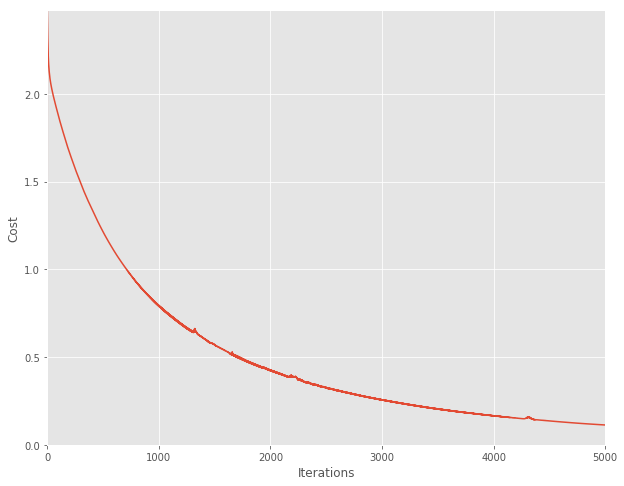

F-Score: 0.855


In [21]:
fig = plt.figure(figsize=(10,8))
plt.plot(cost_history)
plt.ylabel("Cost")
plt.xlabel("Iterations")
plt.axis([0,training_epochs,0,np.max(cost_history)])
plt.show()

p,r,f,s = precision_recall_fscore_support(y_true, y_pred, average='micro')
print( "F-Score:", round(f,3))

In [22]:
def weight_variable(shape):
    initial = tf.truncated_normal(shape, stddev = 0.1)
    return tf.Variable(initial)

def bias_variable(shape):
    initial = tf.constant(1.0, shape = shape)
    return tf.Variable(initial)

def conv2d(x, W):
    return tf.nn.conv2d(x,W,strides=[1,2,2,1], padding='SAME')

def apply_convolution(x,kernel_size,num_channels,depth):
    weights = weight_variable([kernel_size, kernel_size, num_channels, depth])
    biases = bias_variable([depth])
    return tf.nn.relu(tf.add(conv2d(x, weights),biases))

def apply_max_pool(x,kernel_size,stride_size):
    return tf.nn.max_pool(x, ksize=[1, kernel_size, kernel_size, 1], 
                          strides=[1, stride_size, stride_size, 1], padding='SAME')

In [23]:
rnd_indices = np.random.rand(len(labels)) < 0.70

train_x = features[rnd_indices]
train_y= labels[rnd_indices]
test_x = features[~rnd_indices]
test_y = labels[~rnd_indices]

In [24]:
frames = 41
bands = 60

feature_size = 2460 #60x41
num_labels = 10
num_channels = 2

batch_size = 50
kernel_size = 30
depth = 20
num_hidden = 200

learning_rate = 0.01
training_iterations = 2000

In [25]:
X = tf.placeholder(tf.float32, shape=[None,bands,frames,num_channels])
Y = tf.placeholder(tf.float32, shape=[None,num_labels])

cov = apply_convolution(X,kernel_size,num_channels,depth)

shape = cov.get_shape().as_list()
cov_flat = tf.reshape(cov, [-1, shape[1] * shape[2] * shape[3]])

f_weights = weight_variable([shape[1] * shape[2] * depth, num_hidden])
f_biases = bias_variable([num_hidden])
f = tf.nn.sigmoid(tf.add(tf.matmul(cov_flat, f_weights),f_biases))

out_weights = weight_variable([num_hidden, num_labels])
out_biases = bias_variable([num_labels])
y_ = tf.nn.softmax(tf.matmul(f, out_weights) + out_biases)

In [26]:
cross_entropy = -tf.reduce_sum(Y * tf.log(y_))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cross_entropy)
correct_prediction = tf.equal(tf.argmax(y_,1), tf.argmax(Y,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [27]:
init = tf.global_variables_initializer()

In [33]:
cost_history = np.empty(shape=[1],dtype=float)

with tf.Session() as sess:
    #sess.run(tf.initialize_all_variables())
    tf.global_variables_initializer().run()

    for itr in range(training_iterations):    
        offset = (itr * batch_size) % (train_y.shape[0] - batch_size)
        print(offset)
        offset = offset + batch_size
        batch_x = train_x[offset, :]
        batch_y = train_y[offset, :]
        print(batch_y.shape)
        _, c = sess.run([optimizer, cross_entropy],feed_dict={X: batch_x, Y : batch_y})
        cost_history = np.append(cost_history,c)
    
    print('Test accuracy: ',round(sess.run(accuracy, feed_dict={X: test_x, Y: test_y}) , 3))
    fig = plt.figure(figsize=(15,10))
    plt.plot(cost_history)
    plt.axis([0,training_iterations,0,np.max(cost_history)])
    plt.show()

0
(10,)


ValueError: Cannot feed value of shape (193,) for Tensor 'Placeholder_2:0', which has shape '(?, 60, 41, 2)'